In [1]:
# Import necessary libraries
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Helps with real-time data augmentation and image loading.
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import seaborn as sns
import os
from PIL import Image

In [2]:
# Set the directory paths for training and validation datasets
train_dir = 'dataset/train'
val_dir = 'dataset/test'

In [3]:
# For training data: rescale pixel values, and apply augmentation(to prevent overfitting)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# For validation: only rescaling, no augmentation(to measure model performance)
test_datagen = ImageDataGenerator(rescale=1./255)
# Create batches of train,val data from the directory structure
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [4]:
num_train = len(train_generator.classes) 
batch_size = 64
num_val = len(validation_generator.classes)
print(num_train, num_val)

1234 218


In [5]:
# CNN model using Sequential API
model = Sequential()

#1st Convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#2nd Convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#3rd Convolutional layer with 128 filters
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

## Flatten the 3D feature maps to 1D vector before feeding into dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 2 classes (open and closed eyes)
model.add(Dense(2, activation='softmax'))

In [6]:
#Model compilation and training
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

Epoch 1/50
19/19 [==============================] - 22s 1s/step - loss: 0.6407 - accuracy: 0.6128 - val_loss: 0.4059 - val_accuracy: 0.8490
Epoch 2/50
19/19 [==============================] - 5s 287ms/step - loss: 0.3100 - accuracy: 0.8803 - val_loss: 0.2502 - val_accuracy: 0.9010
Epoch 3/50
19/19 [==============================] - 5s 277ms/step - loss: 0.2073 - accuracy: 0.9291 - val_loss: 0.1384 - val_accuracy: 0.9531
Epoch 4/50
19/19 [==============================] - 6s 299ms/step - loss: 0.1482 - accuracy: 0.9496 - val_loss: 0.1197 - val_accuracy: 0.9479
Epoch 5/50
19/19 [==============================] - 5s 276ms/step - loss: 0.1166 - accuracy: 0.9530 - val_loss: 0.1026 - val_accuracy: 0.9531
Epoch 6/50
19/19 [==============================] - 5s 277ms/step - loss: 0.0967 - accuracy: 0.9658 - val_loss: 0.1668 - val_accuracy: 0.9323
Epoch 7/50
19/19 [==============================] - 5s 288ms/step - loss: 0.0887 - accuracy: 0.9692 - val_loss: 0.0847 - val_accuracy: 0.9740
Epoch 8/

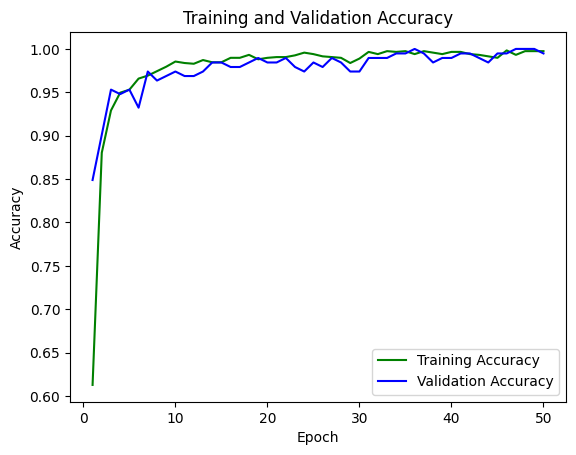

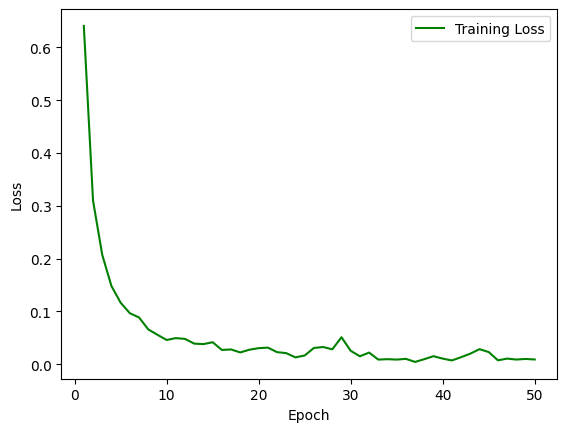

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 51)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
tes_d ='TestSet'
test_data = ImageDataGenerator(rescale=1./255)

test_gen = test_data.flow_from_directory(
        tes_d,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 4232 images belonging to 2 classes.


In [9]:
model.evaluate(test_gen)

67/67 [==============================] - 61s 929ms/step - loss: 7.1834 - accuracy: 0.6009


[7.183437347412109, 0.6008979082107544]

In [10]:
model.save('my_model.h5', overwrite=True)